Exercícios Estatísticos em Python


Mounted at /content/drive


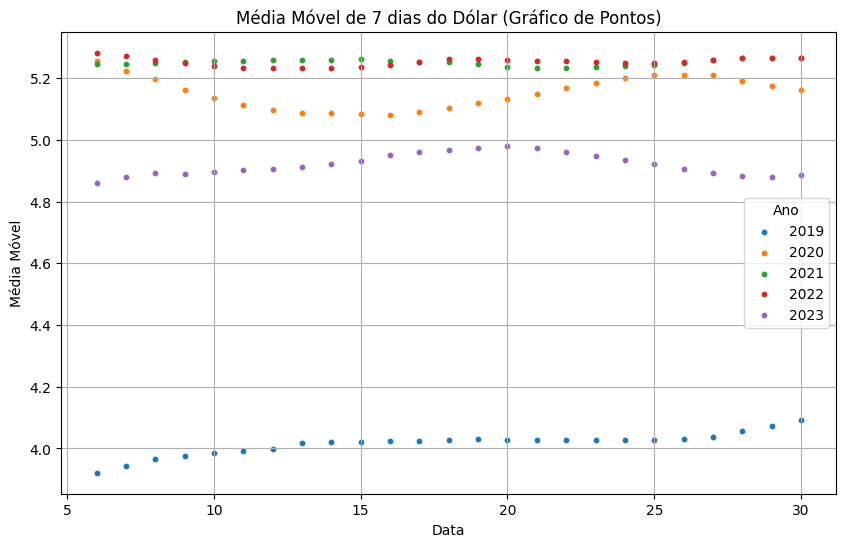

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

# Monta o drive
drive.mount('/content/drive')

# Carrega os dados do arquivo Excel
agosto_2019 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dolar_2019.xlsx')
agosto_2020 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dolar_2020.xlsx')
agosto_2021 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dolar_2021.xlsx')
agosto_2022 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dolar_2022.xlsx')
agosto_2023 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dolar_2023.xlsx')

# Adiciona uma coluna 'Ano' em cada DataFrame
agosto_2019['Ano'] = 2019
agosto_2020['Ano'] = 2020
agosto_2021['Ano'] = 2021
agosto_2022['Ano'] = 2022
agosto_2023['Ano'] = 2023

# Concatena os DataFrames em um único DataFrame
dados = pd.concat([agosto_2019, agosto_2020, agosto_2021, agosto_2022, agosto_2023])

# Calcula a média móvel de 7 dias para cada planilha
dados['Media_Movel'] = dados.groupby('Ano')['Cotação Compra'].transform(lambda x: x.rolling(window=7).mean())

# Cria um gráfico de pontos
plt.figure(figsize=(10, 6))

# Plota os pontos das médias móveis para cada ano
for ano, df_ano in dados.groupby('Ano'):
    plt.scatter(df_ano.index, df_ano['Media_Movel'], label=str(ano), s=10)  # s é o tamanho dos pontos

# Adiciona título e legenda ao gráfico
plt.title('Média Móvel de 7 dias do Dólar (Gráfico de Pontos)')
plt.xlabel('Data')
plt.ylabel('Média Móvel')
plt.legend(title='Ano')
plt.grid(True)

# Exibe o gráfico
plt.show()

Digite o número de classes desejado para o histograma: 15


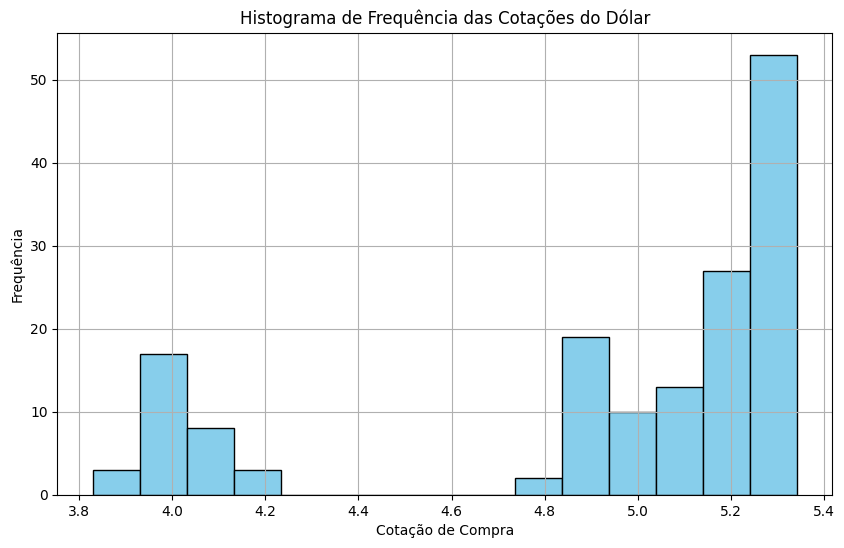

In [2]:
# Solicita o número de classes desejado ao usuário
num_classes = int(input("Digite o número de classes desejado para o histograma: "))

# Cria um histograma de frequência das cotações do dólar
plt.figure(figsize=(10, 6))
plt.hist(dados['Cotação Compra'], bins=num_classes, color='skyblue', edgecolor='black')
plt.title('Histograma de Frequência das Cotações do Dólar')
plt.xlabel('Cotação de Compra')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

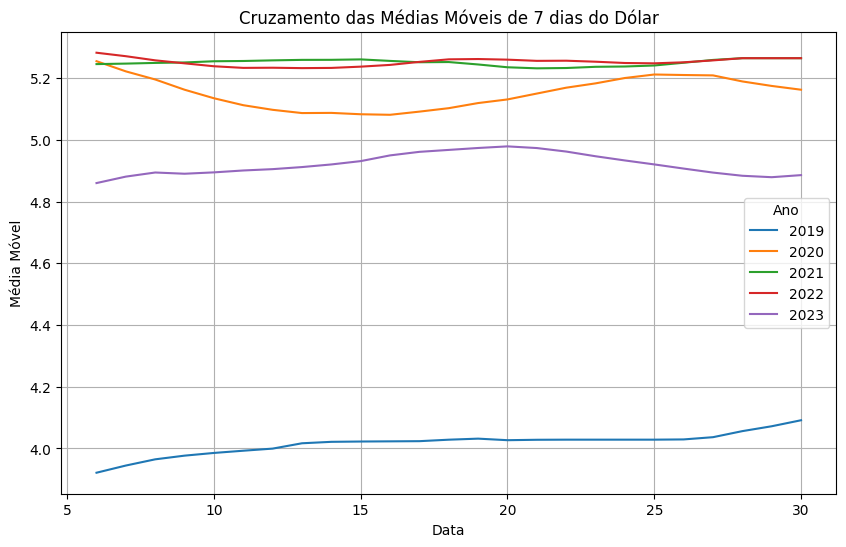

In [3]:
# Cria um gráfico de linhas para o cruzamento das médias móveis
plt.figure(figsize=(10, 6))

# Plota as linhas das médias móveis para cada ano
for ano, df_ano in dados.groupby('Ano'):
    plt.plot(df_ano.index, df_ano['Media_Movel'], label=str(ano))

# Adiciona título e legenda ao gráfico
plt.title('Cruzamento das Médias Móveis de 7 dias do Dólar')
plt.xlabel('Data')
plt.ylabel('Média Móvel')
plt.legend(title='Ano')
plt.grid(True)

# Exibe o gráfico
plt.show()


Este código gera respostas aleatórias para o questionário e calcula o coeficiente Alfa de Cronbach para essas respostas. Em seguida, classifica a qualidade do questionário com base no valor do coeficiente Alfa de Cronbach.




Primeiro passo: Importamos as bibliotecas numpy e pandas.

Segundo passo: Definimos a escala de respostas Likert conforme definido.

Terceiro passo: Simulamos respostas aleatórias para cada pergunta do questionário usando a função np.random.choice.

Quarto passo: Criamos um DataFrame com os dados das respostas.

Quinto passo: Definimos uma função calcular_alfa_cronbach para calcular o coeficiente Alfa de Cronbach com base nos dados do DataFrame.

Sexto passo: Calculamos o coeficiente Alfa de Cronbach para as respostas do questionário.

Sétimo passo: Exibimos as respostas do questionário e o coeficiente Alfa de Cronbach calculado no terminal.

Oitavo passo: Classificamos a qualidade do questionário com base no valor do coeficiente Alfa de Cronbach.


In [4]:
import numpy as np
import pandas as pd

# Definindo a escala de respostas LIKERT
likert_scale = {
    'Agradável': [8, 7, 6, 5, 4, 3, 2, 1],
    'Amistoso': [8, 7, 6, 5, 4, 3, 2, 1],
    'Rejeitador': [1, 2, 3, 4, 5, 6, 7, 8],
    'Prestativo': [8, 7, 6, 5, 4, 3, 2, 1],
    'Sem entusiasmo': [1, 2, 3, 4, 5, 6, 7, 8],
    'Tenso': [1, 2, 3, 4, 5, 6, 7, 8],
    'Distante': [1, 2, 3, 4, 5, 6, 7, 8],
    'Frio': [1, 2, 3, 4, 5, 6, 7, 8],
    'Cooperativo': [8, 7, 6, 5, 4, 3, 2, 1],
    'Apoiador': [8, 7, 6, 5, 4, 3, 2, 1],
    'Maçante': [1, 2, 3, 4, 5, 6, 7, 8],
    'Desequilibrado': [1, 2, 3, 4, 5, 6, 7, 8],
    'Seguro de si': [8, 7, 6, 5, 4, 3, 2, 1],
    'Eficiente': [8, 7, 6, 5, 4, 3, 2, 1],
    'Sombrio': [1, 2, 3, 4, 5, 6, 7, 8],
    'Expansivo': [8, 7, 6, 5, 4, 3, 2, 1],
    'Desagradavel': [1, 2, 3, 4, 5, 6, 7, 8],
    'Inamistoso': [1, 2, 3, 4, 5, 6, 7, 8],
    'Acolhedor': [8, 7, 6, 5, 4, 3, 2, 1],
    'Frustrante': [1, 2, 3, 4, 5, 6, 7, 8],
    'Entusiasta': [8, 7, 6, 5, 4, 3, 2, 1],
    'Calmo': [8, 7, 6, 5, 4, 3, 2, 1],
    'Íntimo': [8, 7, 6, 5, 4, 3, 2, 1],
    'Caloroso': [8, 7, 6, 5, 4, 3, 2, 1],
    'Não-cooperativo': [1, 2, 3, 4, 5, 6, 7, 8],
    'Hostil': [1, 2, 3, 4, 5, 6, 7, 8],
    'Interessante': [8, 7, 6, 5, 4, 3, 2, 1],
    'Equilibrado': [8, 7, 6, 5, 4, 3, 2, 1],
    'Hesitante': [1, 2, 3, 4, 5, 6, 7, 8],
    'Ineficiente': [1, 2, 3, 4, 5, 6, 7, 8],
    'Alegre': [8, 7, 6, 5, 4, 3, 2, 1],
    'Reservado': [1, 2, 3, 4, 5, 6, 7, 8]
}

# Função para simular respostas aleatórias para o questionário
def simular_respostas_aleatorias():
    num_respostas = 100  # número de respostas
    dados_respostas = {}
    for pergunta, escala in likert_scale.items():
        dados_respostas[pergunta] = np.random.choice(escala, num_respostas)
    return pd.DataFrame(dados_respostas)

# Criando DataFrame com os dados das respostas
df_respostas = simular_respostas_aleatorias()
df_respostas


,Agradável,Amistoso,Rejeitador,Prestativo,Sem entusiasmo,Tenso,Distante,Frio,Cooperativo,Apoiador,...,Íntimo,Caloroso,Não-cooperativo,Hostil,Interessante,Equilibrado,Hesitante,Ineficiente,Alegre,Reservado
0,5,8,5,6,7,3,4,4,7,2,...,7,8,4,4,4,6,7,4,8,1
1,7,4,2,8,5,4,7,4,5,3,...,2,6,3,8,3,6,1,3,7,1
2,4,4,4,5,1,5,1,8,1,3,...,1,3,8,2,2,3,7,6,8,1
3,6,6,7,7,6,2,1,8,3,6,...,2,6,8,4,6,3,1,3,5,5
4,8,5,3,3,2,8,4,1,6,5,...,7,5,6,7,4,2,5,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6,4,7,4,1,2,2,4,3,6,...,6,1,4,3,2,5,6,3,1,1
96,7,5,5,4,7,1,8,7,1,8,...,5,8,5,4,3,8,5,7,7,3
97,6,6,1,7,5,2,5,5,5,2,...,5,5,1,6,4,5,8,1,2,5
98,2,4,4,1,5,2,3,2,4,6,...,1,5,6,2,7,8,3,4,6,6


In [5]:
# Exportando o DataFrame para um arquivo Excel
df_respostas.to_excel("respostas_questionario.xlsx", index=False)
print("\nDataFrame exportado para o arquivo 'respostas_questionario.xlsx'.")


DataFrame exportado para o arquivo 'respostas_questionario.xlsx'.


In [6]:
# 1. Obtendo o número de itens (perguntas) e o número de respondentes
num_itens = len(df_respostas.columns)
num_respondentes = len(df_respostas)

print("\nNúmero de itens:", num_itens)
print("Número de respondentes:", num_respondentes)


Número de itens: 32
Número de respondentes: 100


In [7]:
# 2. Calculando a matriz de correlação entre os itens
matriz_correlacao = df_respostas.corr()

print("\nMatriz de correlação entre os itens:")
print(matriz_correlacao)


Matriz de correlação entre os itens:
                 Agradável  Amistoso  Rejeitador  Prestativo  Sem entusiasmo  \
Agradável         1.000000 -0.031585   -0.015456    0.161519        0.145275   
Amistoso         -0.031585  1.000000    0.120534   -0.095853       -0.069382   
Rejeitador       -0.015456  0.120534    1.000000   -0.134063       -0.046646   
Prestativo        0.161519 -0.095853   -0.134063    1.000000        0.225422   
Sem entusiasmo    0.145275 -0.069382   -0.046646    0.225422        1.000000   
Tenso            -0.005748 -0.004914    0.195374    0.021447        0.098351   
Distante         -0.053782 -0.110243   -0.137067    0.085189        0.107950   
Frio             -0.064951 -0.002041    0.058247   -0.101364       -0.067045   
Cooperativo       0.028693  0.027238   -0.054936    0.072423        0.072391   
Apoiador         -0.027184  0.107151    0.114866    0.065825       -0.072037   
Maçante          -0.115186  0.066595   -0.081884    0.053817       -0.151609   
De

In [8]:
# Exportando a matriz de correlação para um arquivo Excel
matriz_correlacao.to_excel("matriz_correlacao.xlsx")
print("\nMatriz de correlação exportada para o arquivo 'matriz_correlacao.xlsx'.")


Matriz de correlação exportada para o arquivo 'matriz_correlacao.xlsx'.


In [9]:
# 3. Calculando a média das correlações de cada item com todos os outros itens
media_correlacoes = matriz_correlacao.mean()

print("\nMédia das correlações de cada item com todos os outros itens:")
print(media_correlacoes)


Média das correlações de cada item com todos os outros itens:
Agradável          0.029377
Amistoso           0.044608
Rejeitador         0.024506
Prestativo         0.055850
Sem entusiasmo     0.037920
Tenso              0.046884
Distante           0.014984
Frio               0.038569
Cooperativo        0.011110
Apoiador           0.026716
Maçante           -0.000909
Desequilibrado     0.028699
Seguro de si       0.035328
Eficiente          0.024425
Sombrio            0.034039
Expansivo          0.023079
Desagradavel       0.044076
Inamistoso         0.018952
Acolhedor          0.040642
Frustrante         0.003281
Entusiasta         0.050841
Calmo              0.035491
Íntimo             0.037859
Caloroso          -0.001320
Não-cooperativo    0.026198
Hostil             0.046252
Interessante       0.026158
Equilibrado        0.043300
Hesitante          0.029882
Ineficiente        0.061378
Alegre             0.026189
Reservado          0.034970
dtype: float64


In [10]:
# 4. Calculando a variância total dos escores de cada item
variancia_total = df_respostas.var()

print("\nVariância total dos escores de cada item:")
print(variancia_total)


Variância total dos escores de cada item:
Agradável          4.996364
Amistoso           5.214040
Rejeitador         5.580909
Prestativo         4.835859
Sem entusiasmo     5.820606
Tenso              6.172121
Distante           5.116263
Frio               4.603939
Cooperativo        5.492020
Apoiador           4.785758
Maçante            5.629899
Desequilibrado     4.600404
Seguro de si       6.573232
Eficiente          5.892828
Sombrio            5.281919
Expansivo          5.526869
Desagradavel       5.825758
Inamistoso         5.464242
Acolhedor          5.527677
Frustrante         5.717172
Entusiasta         5.505455
Calmo              4.731717
Íntimo             5.182222
Caloroso           4.745051
Não-cooperativo    5.270606
Hostil             5.108687
Interessante       5.058081
Equilibrado        5.686869
Hesitante          6.270303
Ineficiente        4.207677
Alegre             4.951414
Reservado          6.191818
dtype: float64


In [11]:
# Demonstrando a "Soma das variâncias totais" e a "Variância total da soma"
soma_variancias_totais = variancia_total.sum()
variancia_total_soma = df_respostas.sum().var()

print("\nSoma das variâncias totais:", soma_variancias_totais)
print("Variância total da soma:", variancia_total_soma)


Soma das variâncias totais: 171.56777777777776
Variância total da soma: 673.3538306451613


In [12]:
# 5. Calculando o coeficiente Alfa de Cronbach
# Fórmula: (k / (k - 1)) * (1 - (Soma das variâncias totais / Variância total da soma))
alfa_cronbach = (num_itens / (num_itens - 1)) * (1 - (variancia_total.sum() / df_respostas.sum().var()))

print("\nCoeficiente Alfa de Cronbach calculado:", alfa_cronbach)


Coeficiente Alfa de Cronbach calculado: 0.769242968793669


In [13]:
# Classificando a qualidade do questionário com base no valor do coeficiente Alfa de Cronbach
if alfa_cronbach > 0.9:
    print("Qualidade do questionário: Excelente")
elif 0.8 <= alfa_cronbach <= 0.9:
    print("Qualidade do questionário: Bom")
elif 0.7 <= alfa_cronbach < 0.8:
    print("Qualidade do questionário: Aceitável")
elif 0.6 <= alfa_cronbach < 0.7:
    print("Qualidade do questionário: Questionável")
elif 0.5 <= alfa_cronbach < 0.6:
    print("Qualidade do questionário: Pobre")
else:
    print("Qualidade do questionário: Inaceitável")

Qualidade do questionário: Aceitável
